In [1]:
"""
Suppose you have the following dataset*, which is a list of leaders 
for all independent states in the world as outlined in Gleditsch and Ward.

With this data, for all leaders that have valid birth and death years, 
can you plot the life expectancy over time for these leaders?

Here I would probably recommend a box and whisker plot to show 
distributions over time in the same chart.

data source: http://www.ksgleditsch.com/archigos.html
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('./data/political_leaders.csv')
df.head(5)

,obsid,leadid,ccode,idacr,leader,startdate,enddate,entry,exit,exitcode,...,yrdied,borndate,deathdate,dbpedia.uri,num.entry,num.exit,num.exitcode,num.posttenurefate,fties,ftcur
0,ECU-1869,3539f318-3bbd-11e5-afeb-eb6f07f9fec7,130,ECU,Gabriel García Moreno,1869-01-19,1875-08-06,Irregular,Irregular,Unknown,...,1875,1821-12-24,1875-08-06,http://dbpedia.org/resource/Gabriel_Garc%C3%AD...,1,3.0,-999,3.0,NaN,NaN
1,HAI-1874,81df6d19-1e42-11e4-b4cd-db5882bf8def,41,HAI,Rameau,1874-06-11,1876-04-15,Irregular,Irregular,"Removed by Military, without Foreign Support",...,1876,NaN,1876-04-15,NaN,1,3.0,6,3.0,NaN,NaN
2,LBR-1872,197863a8-3bbd-11e5-afeb-eb6f07f9fec7,450,LBR,Joseph Jenkins Roberts,1872-01-01,1875-06-27,Irregular,Retired Due to Ill Health,Regular,...,1876,NaN,NaN,http://dbpedia.org/resource/Joseph_Jenkins_Rob...,1,2.1,0,0.0,NaN,NaN
3,TUR-1861,823ce4cd-1e42-11e4-b4cd-db5882bf8def,640,TUR,Abdul Aziz,1861-06-25,1876-05-30,Regular,Irregular,Unknown,...,1876,NaN,1876-06-04,NaN,0,3.0,-999,3.0,NaN,NaN
4,PAR-1874,81fe84c0-1e42-11e4-b4cd-db5882bf8def,150,PAR,Gill,1874-11-25,1877-04-12,Irregular,Irregular,Unknown,...,1877,NaN,NaN,http://dbpedia.org/resource/Juan_Bautista_Gill,1,3.0,-999,3.0,NaN,NaN


In [3]:
df.columns

Index(['obsid', 'leadid', 'ccode', 'idacr', 'leader', 'startdate', 'enddate',
       'entry', 'exit', 'exitcode', 'prevtimesinoffice', 'posttenurefate',
       'gender', 'yrborn', 'yrdied', 'borndate', 'deathdate', 'dbpedia.uri',
       'num.entry', 'num.exit', 'num.exitcode', 'num.posttenurefate', 'fties',
       'ftcur'],
      dtype='object')

In [4]:
df.shape

(3409, 24)

In [5]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
obsid,3409,3409,BNG-1991,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
leadid,3409,2802,8220a9b1-1e42-11e4-b4cd-db5882bf8def,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ccode,3409,NaN,NaN,NaN,364.709,248.698,2,155,325,560,950
idacr,3409,189,SWZ,141,NaN,NaN,NaN,NaN,NaN,NaN,NaN
leader,3409,2757,del Castillo,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
startdate,3409,3245,1931-03-01,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
enddate,3409,3119,2015-12-31,166,NaN,NaN,NaN,NaN,NaN,NaN,NaN
entry,3409,4,Regular,2796,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exit,3409,8,Regular,2293,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exitcode,3409,15,Regular,2566,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.isna().sum()

obsid                    0
leadid                   0
ccode                    0
idacr                    0
leader                   0
startdate                0
enddate                  0
entry                    0
exit                     0
exitcode                 0
prevtimesinoffice        0
posttenurefate           0
gender                   0
yrborn                   0
yrdied                   0
borndate              1288
deathdate             2563
dbpedia.uri           1942
num.entry                0
num.exit                 0
num.exitcode             0
num.posttenurefate       0
fties                 3140
ftcur                 3162
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3409 entries, 0 to 3408
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   obsid               3409 non-null   object 
 1   leadid              3409 non-null   object 
 2   ccode               3409 non-null   int64  
 3   idacr               3409 non-null   object 
 4   leader              3409 non-null   object 
 5   startdate           3409 non-null   object 
 6   enddate             3409 non-null   object 
 7   entry               3409 non-null   object 
 8   exit                3409 non-null   object 
 9   exitcode            3409 non-null   object 
 10  prevtimesinoffice   3409 non-null   int64  
 11  posttenurefate      3409 non-null   object 
 12  gender              3409 non-null   object 
 13  yrborn              3409 non-null   int64  
 14  yrdied              3409 non-null   int64  
 15  borndate            2121 non-null   object 
 16  deathd

In [8]:
df_short = df[['yrborn', 'yrdied']].copy()
df_short.head()

,yrborn,yrdied
0,1821,1875
1,1828,1876
2,1809,1876
3,1830,1876
4,1840,1877


In [9]:
df_short['life'] = df['yrdied'] - df['yrborn']
df_short.head()

,yrborn,yrdied,life
0,1821,1875,54
1,1828,1876,48
2,1809,1876,67
3,1830,1876,46
4,1840,1877,37


In [10]:
plot_df = df_short.loc[(df_short.yrdied > df_short.yrborn) & (df_short.yrborn > 0)]
plot_df.count()

yrborn    2350
yrdied    2350
life      2350
dtype: int64

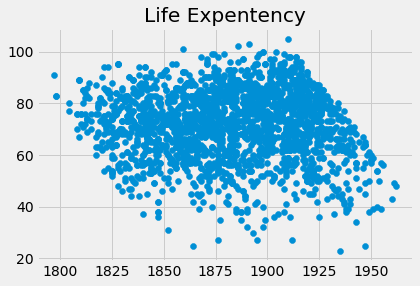

In [11]:
plt.scatter(plot_df.yrborn
            , plot_df.life
           )
plt.title('Life Expentency');

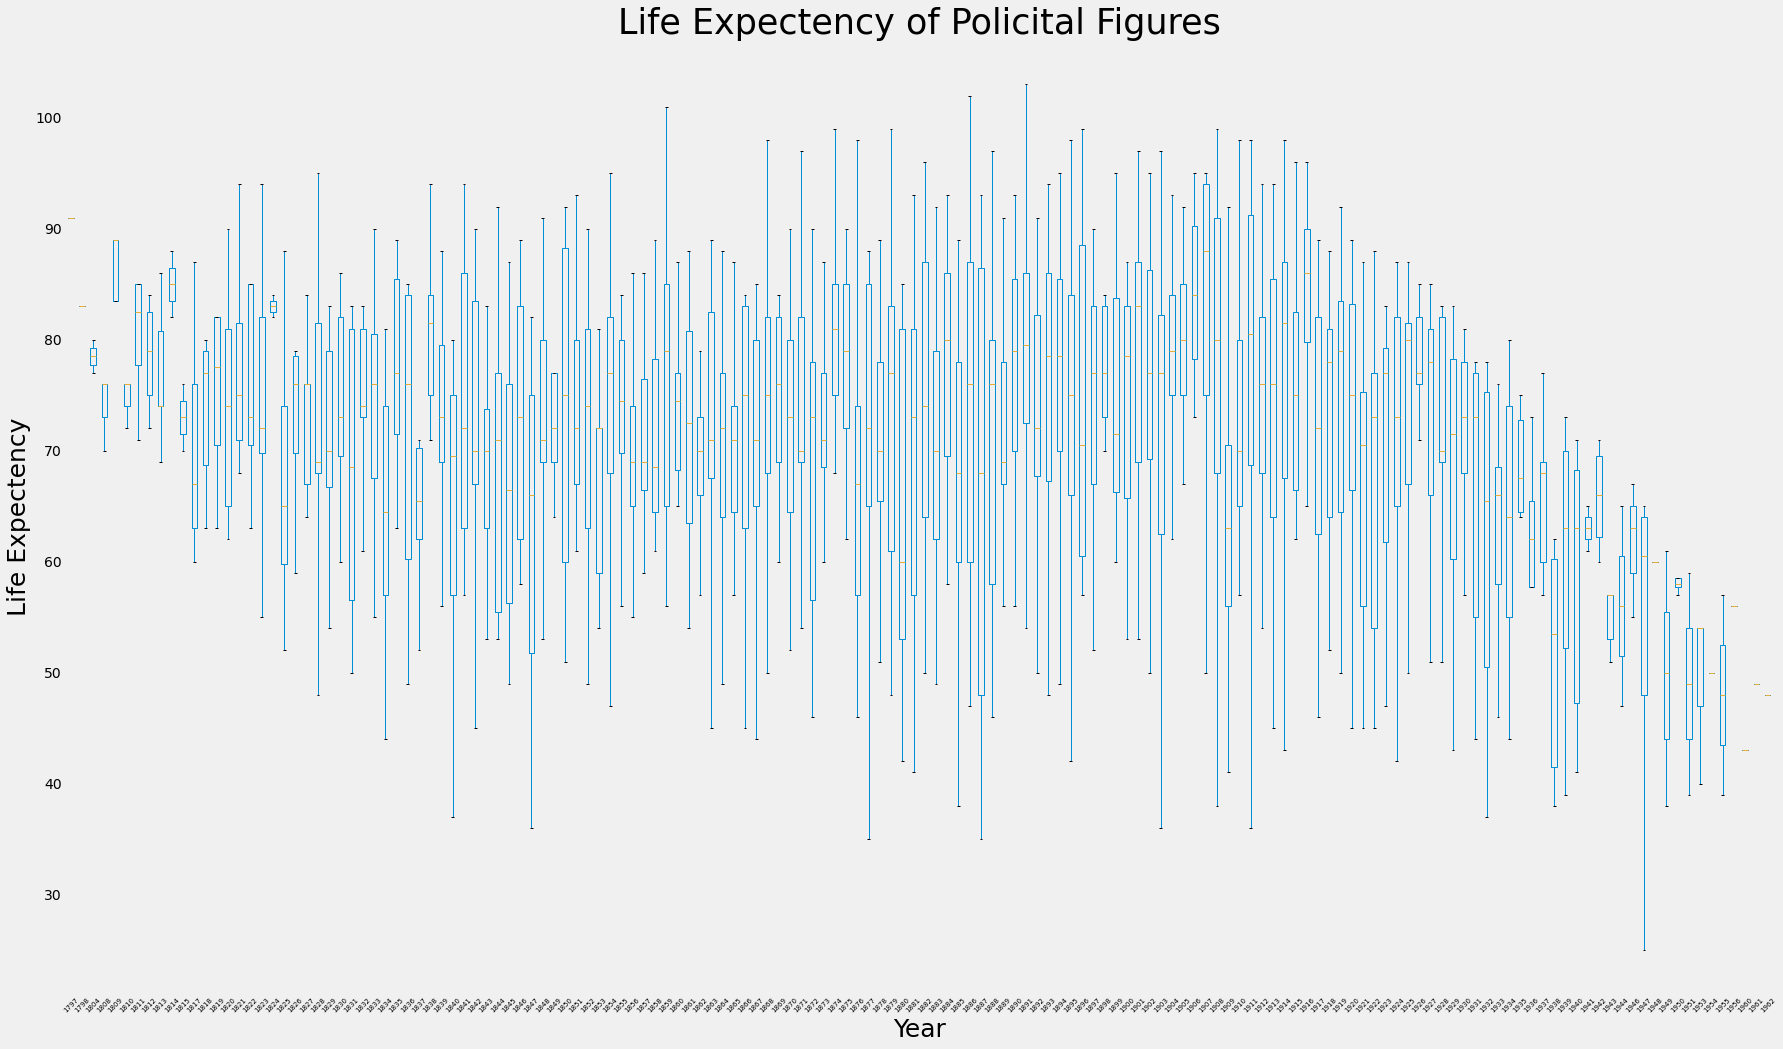

In [12]:
plt.rcParams['figure.figsize'] = [25,15]
plot_df.boxplot(column='life', by='yrborn', showfliers=False, grid=False)
plt.suptitle('')
plt.xticks(rotation=45
           , fontsize=7)
plt.ylabel('Life Expectency', fontsize = 25)
plt.xlabel('Year', fontsize = 25)
plt.title('Life Expectency of Policital Figures', fontsize = 35)
plt.tight_layout();